# Elephant Detection and GPS Localization Demo 🐘📍

Welcome! This Colab notebook allows you to upload a single drone image, detect elephants within it using a YOLO model, and estimate their GPS coordinates.

**How to use:**
1.  Run the "Setup" cell to install necessary libraries and download the model.
2.  Run the "Upload Image" cell and select a JPG image from your computer.
3.  Run the "Process Image and Get Results" cell. This will perform detection, calculate GPS, and display the results.
4.  The results (image with IDs, coordinates CSV, distances CSV) will be displayed and made available for download.

---
## 1. Setup Environment

In [1]:
# Install necessary packages
!pip install ultralytics piexif geopy pyproj -q
!apt-get install -y exiftool -qq

# Import necessary libraries
import cv2
import torch
import numpy as np
from ultralytics import YOLO
import pandas as pd
import time
import os
from pathlib import Path
import matplotlib.pyplot as plt
from pyproj import Transformer
import math
import re
from datetime import datetime, timedelta
import subprocess
import json
import csv
from google.colab import files
from PIL import Image
import io
from geopy.distance import geodesic
from IPython.display import Image as IPImage, display

# Create output directories
os.makedirs("Detections", exist_ok=True)
os.makedirs("Processed_Output", exist_ok=True)

print("\nSetup Complete!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.5 MB/s eta 0:00:00
Selecting previously unselected package libarchive-zip-perl.
(Reading database ... 126109 files and directories currently inst


##  Upload Model

In [4]:
print("Please upload 'best_xl.pt':")
uploaded_model = files.upload()
if 'best_xl.pt' not in uploaded_model:
  print("\nERROR: 'best_xl.pt' was not uploaded. Please upload the model file to proceed.")
else:
  print("\nModel 'best_xl.pt' uploaded successfully!")

Please upload 'best_xl.pt':


Saving best_xl.pt to best_xl.pt

Model 'best_xl.pt' uploaded successfully!


---
## 2. Upload Your Image

Please upload a single JPG image:


Saving DJI_0396.JPG to DJI_0396.JPG

Loaded and saved image: DJI_0396.JPG


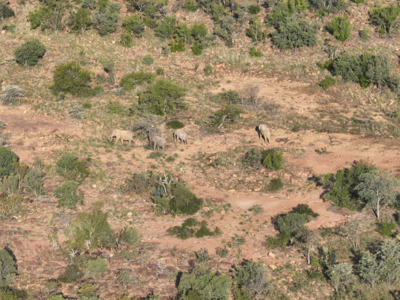

In [2]:
from google.colab import files
import io
from PIL import Image

# Upload image
print("Please upload a single JPG image:")
uploaded = files.upload()

# Load and save the uploaded image
uploaded_image_path = None
for fn in uploaded.keys():
    if fn.lower().endswith('.jpg') or fn.lower().endswith('.jpeg'):
        uploaded_image_path = f"/content/{fn}"
        with open(uploaded_image_path, 'wb') as f:
            f.write(uploaded[fn])
        print(f"\nLoaded and saved image: {fn}")

        # Display the uploaded image
        img_display = Image.open(io.BytesIO(uploaded[fn]))
        img_display.thumbnail((400, 400)) # Resize for display
        display(img_display)
        break # Process only the first uploaded JPG

if not uploaded_image_path:
    print("\nERROR: No JPG image was uploaded. Please run this cell again and upload a valid image.")

---
## 3. Process Image and Get Results

Starting processing for: /content/DJI_0396.JPG
Running detection on /content/DJI_0396.JPG...
Detection complete. Found 4 objects. Saved detection image and data to Detections/DJI_0396.txt.
Waiting for file: Detections/DJI_0396.txt...
File found: Detections/DJI_0396.txt
Loading bounding boxes from Detections/DJI_0396.txt...
Loaded 4 bounding boxes.
Starting GPS pipeline...
Extracting metadata...
Running exiftool...
exiftool successful.
  RelativeAltitude: +85.000
  GimbalPitch: -16.7
  FocalLength: 29.9 mm
  ImageWidth: 4000
  ImageHeight: 3000
  GPSLatitude: 24 deg 13' 36.24" S
  GPSLongitude: 27 deg 49' 37.44" E
Metadata extraction successful.
Calculating GPS for each bounding box center...
  Processing Box 1 at (1801.3, 1368.8)...
    -> GPS: -24.227582, 27.828200
  Processing Box 2 at (1219.2, 1374.2)...
    -> GPS: -24.227392, 27.827947
  Processing Box 3 at (1596.0, 1438.5)...
    -> GPS: -24.227500, 27.828118
  Processing Box 4 at (2636.4, 1336.6)...
    -> GPS: -24.228127, 27.82

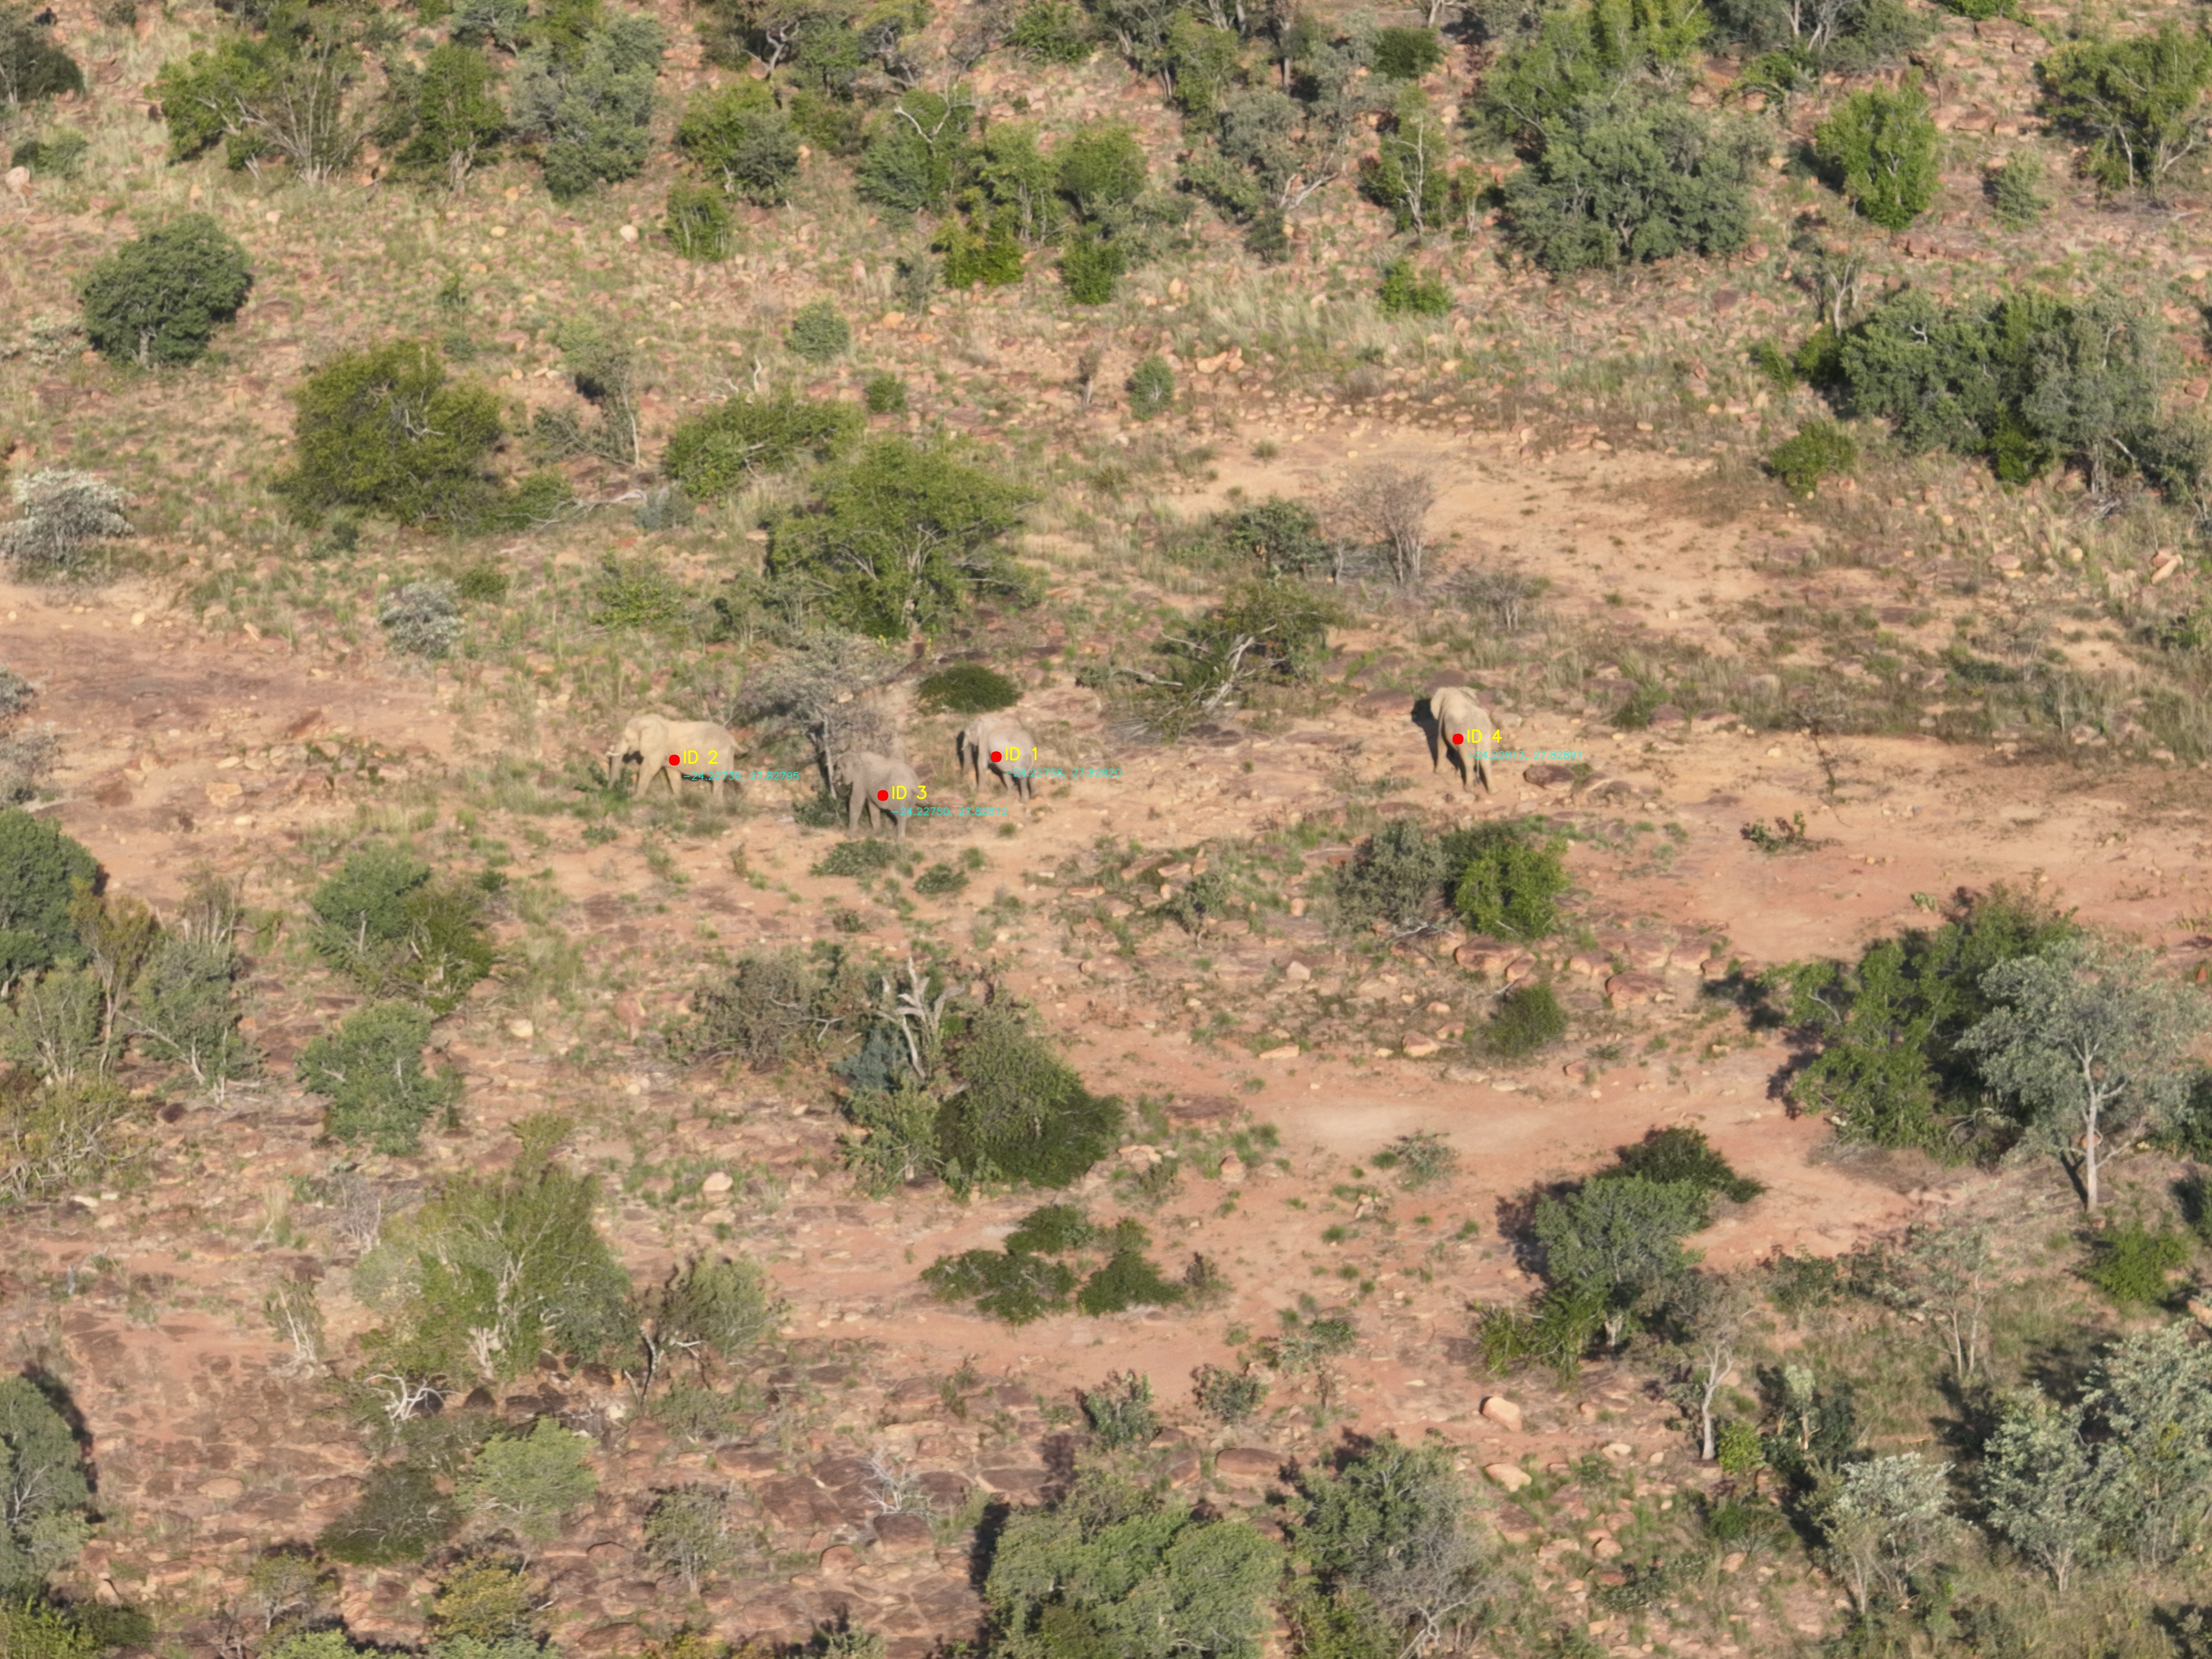


--- Download Links --- 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# --- Define Helper Functions ---
import time # Import time for delays
import traceback # Import for detailed error logging

def Find_Elephants(image_path):
    # Check if model file exists
    model_path = "best_xl.pt"
    if not os.path.exists(model_path):
        print(f"ERROR: Model file '{model_path}' not found. Please ensure it was downloaded or uploaded correctly in Step 1.")
        return None, None

    model = YOLO(model_path)
    print(f"Running detection on {image_path}...")
    results = model.predict(source=image_path, conf=0.6, verbose=False) # Added verbose=False for cleaner output
    output_dir = "Detections"
    im1 = cv2.imread(image_path)
    height, width, _ = im1.shape
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    yolo_format_data = []
    num_objects = 0

    for box in results[0].boxes:
        num_objects += 1
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(float, box.xyxy[0])
        cv2.rectangle(im1, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(im1, f'Class: {cls}, Conf: {conf:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        xmin_norm = x1 / width
        ymin_norm = y1 / height
        xmax_norm = x2 / width
        ymax_norm = y2 / height
        yolo_format_data.append(f"{cls} {conf:.6f} {xmin_norm:.6f} {ymin_norm:.6f} {xmax_norm:.6f} {ymax_norm:.6f}")

    output_image_path = os.path.join(output_dir, f"{base_name}_detection.jpg")
    output_txt_path = os.path.join(output_dir, f"{base_name}.txt")
    cv2.imwrite(output_image_path, im1)
    with open(output_txt_path, 'w') as f:
        f.write("\n".join(yolo_format_data))
    print(f"Detection complete. Found {num_objects} objects. Saved detection image and data to {output_txt_path}.")
    return output_txt_path, output_image_path

def extract_exiftool_metadata(image_path):
    print("Running exiftool...")
    result = subprocess.run(['exiftool', '-j', image_path], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if result.returncode != 0:
        raise RuntimeError(f"exiftool failed: {result.stderr}")
    print("exiftool successful.")
    metadata = json.loads(result.stdout)[0]
    # print("Full EXIF Data:", json.dumps(metadata, indent=2)) # Uncomment for full debug
    return metadata

def dms_to_decimal(dms_str):
    pattern = r'(\d+)[^0-9.]*(\d*)[^0-9.]*([\d.]+)[^0-9.]*([NSEW])' # Made minutes optional
    match = re.search(pattern, dms_str.strip(), re.IGNORECASE)
    if not match: raise ValueError(f"Invalid or unparsed DMS format: {dms_str}")
    degrees, minutes, seconds, direction = match.groups()
    minutes = float(minutes) if minutes else 0.0
    decimal = float(degrees) + minutes/60 + float(seconds)/3600
    if direction.upper() in ['S', 'W']: decimal = -decimal
    return decimal

def extract_metadata(image_path):
    print("Extracting metadata...")
    metadata = extract_exiftool_metadata(image_path)

    rel_alt_val = metadata.get('RelativeAltitude')
    pitch_val = metadata.get('GimbalPitchDegree', metadata.get('GimbalPitch'))
    focal_len_val = metadata.get('FocalLength')
    img_width_val = metadata.get('ImageWidth')
    img_height_val = metadata.get('ImageHeight')
    gps_lat_val = metadata.get('GPSLatitude')
    gps_lon_val = metadata.get('GPSLongitude')

    print(f"  RelativeAltitude: {rel_alt_val}")
    print(f"  GimbalPitch: {pitch_val}")
    print(f"  FocalLength: {focal_len_val}")
    print(f"  ImageWidth: {img_width_val}")
    print(f"  ImageHeight: {img_height_val}")
    print(f"  GPSLatitude: {gps_lat_val}")
    print(f"  GPSLongitude: {gps_lon_val}")

    if not all([rel_alt_val, pitch_val, focal_len_val, img_width_val, img_height_val, gps_lat_val, gps_lon_val]):
         missing = [k for k, v in locals().items() if v is None and k.endswith('_val')]
         raise ValueError(f"Missing essential EXIF tags: {missing}")

    rel_alt = float(rel_alt_val)
    pitch_deg = float(pitch_val)
    focal_length_str = str(focal_len_val)
    focal_length_mm = float(focal_length_str.split(' ')[0])
    sensor_width_mm, sensor_height_mm = 17.3, 13.0
    img_width, img_height = int(img_width_val), int(img_height_val)

    latitude, longitude = dms_to_decimal(gps_lat_val), dms_to_decimal(gps_lon_val)
    print("Metadata extraction successful.")
    return latitude, longitude, rel_alt, pitch_deg, focal_length_mm, sensor_width_mm, sensor_height_mm, img_width, img_height

def get_camera_intrinsics(f_mm, s_w_mm, s_h_mm, i_w, i_h):
    fx = i_w * f_mm / s_w_mm
    fy = i_h * f_mm / s_h_mm
    cx, cy = i_w / 2, i_h / 2
    return np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]])

def get_rotation_matrix(pitch_deg, yaw_deg=0.0, roll_deg=0.0):
    # --- MODIFICATION HERE ---
    # Adjust pitch by -90 degrees to align with a downward-looking frame
    pitch = math.radians(pitch_deg - 90.0)
    # --- END MODIFICATION ---

    yaw = math.radians(yaw_deg)
    roll = math.radians(roll_deg)

    R_x = np.array([[1, 0, 0],
                    [0, math.cos(roll), -math.sin(roll)],
                    [0, math.sin(roll), math.cos(roll)]])

    R_y = np.array([[math.cos(pitch), 0, math.sin(pitch)],
                    [0, 1, 0],
                    [-math.sin(pitch), 0, math.cos(pitch)]])

    R_z = np.array([[math.cos(yaw), -math.sin(yaw), 0],
                    [math.sin(yaw), math.cos(yaw), 0],
                    [0, 0, 1]])

    # Apply yaw, then pitch, then roll (adjust order if needed based on drone frame)
    R = R_z @ R_y @ R_x
    return R

def enu_to_wgs84(x, y, origin_lat, origin_lon):
    # Transformer: From WGS84 (lat/lon) to ECEF (xyz)
    t_local = Transformer.from_crs("epsg:4326", "epsg:4978", always_xy=True)
    # Transformer: From ECEF (xyz) back to WGS84 (lat/lon)
    t_wgs = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

    # Convert origin (lat/lon) to ECEF (x0, y0, z0)
    ecef_x0, ecef_y0, ecef_z0 = t_local.transform(origin_lon, origin_lat, 0)

    # --- Simplified ENU to ECEF transformation ---
    # This assumes the ground plane is tangent to the ellipsoid at the origin.
    # It adds ENU (East=x, North=y) offsets to the ECEF origin's x and y.
    # This is an approximation. A full rotation based on origin lat/lon
    # would be more accurate but adds complexity.
    ecef_x = ecef_x0 + x
    ecef_y = ecef_y0 + y
    ecef_z = ecef_z0 # Assume Z (Up) is handled by the ECEF frame

    # Convert the new ECEF point back to WGS84 (lat/lon)
    lon, lat, _ = t_wgs.transform(ecef_x, ecef_y, ecef_z)
    return lat, lon

def image_point_to_gps(u, v, K, R, cam_h, o_lat, o_lon):
    pixel = np.array([u, v, 1])
    ray_cam = np.linalg.inv(K) @ pixel
    ray_world = R @ ray_cam
    if ray_world[2] >= 0:
        print(f"  Warning: Point ({u},{v}) projects above horizon, skipping.")
        return None, None
    scale = -cam_h / ray_world[2]
    ground_point = ray_world * scale
    enu_x, enu_y = ground_point[0], ground_point[1]
    return enu_to_wgs84(enu_x, enu_y, o_lat, o_lon)

def run_pipeline(image_path, bounding_boxes):
    print("Starting GPS pipeline...")
    try:
        lat, lon, alt, pitch, f_mm, s_w, s_h, i_w, i_h = extract_metadata(image_path)
    except Exception as e:
        print(f"ERROR extracting metadata: {e}")
        traceback.print_exc() # Print full error details
        return None

    K = get_camera_intrinsics(f_mm, s_w, s_h, i_w, i_h)
    R = get_rotation_matrix(pitch)
    gps_results = []
    print("Calculating GPS for each bounding box center...")
    for i, box in enumerate(bounding_boxes, start=1):
        x_min, y_min, x_max, y_max = box
        center_u = (x_min + x_max) / 2 * i_w
        center_v = (y_min + y_max) / 2 * i_h
        print(f"  Processing Box {i} at ({center_u:.1f}, {center_v:.1f})...")
        gps_lat, gps_lon = image_point_to_gps(center_u, center_v, K, R, alt, lat, lon)
        if gps_lat is not None:
          gps_results.append((i, (center_u, center_v), (gps_lat, gps_lon)))
          print(f"    -> GPS: {gps_lat:.6f}, {gps_lon:.6f}")
        else:
          print(f"    -> Could not get GPS for Box {i}.")
    print("GPS pipeline finished.")
    return gps_results

def load_bounding_boxes_from_txt(txt_path):
    boxes = []
    if not os.path.exists(txt_path):
        print(f"ERROR: Txt file not found at {txt_path}")
        return None # Return None to indicate error
    print(f"Loading bounding boxes from {txt_path}...")
    with open(txt_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 6:
                _, _, xmin, ymin, xmax, ymax = map(float, parts)
                boxes.append((xmin, ymin, xmax, ymax))
    print(f"Loaded {len(boxes)} bounding boxes.")
    return boxes

def save_and_display_results(image_path, results, base_name):
    img = cv2.imread(image_path)
    output_dir = "Processed_Output"
    csv_path = os.path.join(output_dir, f"{base_name}_coordinates.csv")
    dist_csv_path = os.path.join(output_dir, f"{base_name}_distances.csv")
    img_path = os.path.join(output_dir, f"{base_name}_processed.jpg")

    with open(csv_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['ObjectID', 'Latitude', 'Longitude'])
        for obj_id, (_, _), (lat, lon) in results:
            writer.writerow([obj_id, f"{lat:.6f}", f"{lon:.6f}"])

    ids = [r[0] for r in results]
    coords = [(r[2][0], r[2][1]) for r in results]
    with open(dist_csv_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['ObjectID_1', 'ObjectID_2', 'Distance_meters'])
        for i in range(len(results)):
            for j in range(i + 1, len(results)):
                dist = geodesic(coords[i], coords[j]).meters
                writer.writerow([ids[i], ids[j], f"{dist:.2f}"])

    for obj_id, (u, v), (lat, lon) in results:
        pos = (int(u), int(v))
        cv2.circle(img, pos, 10, (0, 0, 255), -1) # Draw red dot
        cv2.putText(img, f"ID {obj_id}", (pos[0] + 15, pos[1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(img, f"{lat:.5f}, {lon:.5f}", (pos[0] + 15, pos[1] + 35), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 1, cv2.LINE_AA)

    cv2.imwrite(img_path, img)

    print("\n--- Results ---")
    print(f"Processed image saved to: {img_path}")
    print(f"Coordinates saved to: {csv_path}")
    print(f"Distances saved to: {dist_csv_path}")

    print("\nDisplaying Processed Image:")
    display(IPImage(filename=img_path))

    print("\n--- Download Links --- ")
    try:
        files.download(img_path)
        files.download(csv_path)
        files.download(dist_csv_path)
    except Exception as e:
        print(f"Could not automatically download files. You can download them from the 'Processed_Output' folder in the file browser on the left. Error: {e}")
    return csv_path, dist_csv_path, img_path

def wait_for_file(file_path, timeout=10):
    """Waits for a file to exist up to a timeout (in seconds)."""
    start_time = time.time()
    print(f"Waiting for file: {file_path}...")
    while not os.path.exists(file_path):
        time.sleep(0.5) # Check every 0.5 seconds
        if time.time() - start_time > timeout:
            print(f"ERROR: Timeout waiting for {file_path}")
            return False
    print(f"File found: {file_path}")
    return True

# --- Main Execution Block ---

if 'uploaded_image_path' in locals() and uploaded_image_path and os.path.exists(uploaded_image_path):
    image_to_process = uploaded_image_path
    print(f"Starting processing for: {image_to_process}")

    # 1. Find Elephants (Detection)
    txt_path, _ = Find_Elephants(image_to_process)

    # 2. Wait for & Load Detections
    if txt_path and wait_for_file(txt_path):
        boxes = load_bounding_boxes_from_txt(txt_path)

        if boxes is not None and len(boxes) > 0 :
            # 3. Run GPS Pipeline
            gps_results = run_pipeline(image_to_process, boxes)

            if gps_results and len(gps_results) > 0:
                # 4. Save and Display Results
                base_name = Path(image_to_process).stem
                save_and_display_results(image_to_process, gps_results, base_name)
            else:
                print("Could not calculate GPS coordinates for any/all boxes.") # Updated message
        elif boxes is not None and len(boxes) == 0:
             print("No bounding boxes found in the txt file (though objects were detected). Check Txt file content.")
        else:
             print("Failed to load bounding boxes. Cannot proceed.")

    else:
        print("Detection failed or txt file not found. Cannot proceed.")
else:
    print("ERROR: No image was uploaded or found. Please run the 'Upload Image' cell first.")

---
## 4. (Optional) View Coordinates & Distances

In [13]:
import pandas as pd

base_name = None
if 'uploaded_image_path' in locals() and uploaded_image_path:
    base_name = Path(uploaded_image_path).stem

if base_name:
    coords_file = f"Processed_Output/{base_name}_coordinates.csv"
    dists_file = f"Processed_Output/{base_name}_distances.csv"

    if os.path.exists(coords_file):
        print("--- Coordinates (First 10 rows) ---")
        df_coords = pd.read_csv(coords_file)
        print(df_coords.head(10).to_string())
    else:
        print(f"Coordinates file ({coords_file}) not found.")

    if os.path.exists(dists_file):
        print("\n--- Distances (First 10 rows) ---")
        df_dists = pd.read_csv(dists_file)
        print(df_dists.head(10).to_string())
    else:
        print(f"Distances file ({dists_file}) not found.")
else:
    print("Processing hasn't been run yet, or no image was uploaded.")

--- Coordinates (First 10 rows) ---
   ObjectID   Latitude  Longitude
0         1 -24.227582  27.828200
1         2 -24.227392  27.827947
2         3 -24.227500  27.828118
3         4 -24.228127  27.828909

--- Distances (First 10 rows) ---
   ObjectID_1  ObjectID_2  Distance_meters
0           1           2            33.28
1           1           3            12.27
2           1           4            93.98
3           2           3            21.20
4           2           4           127.26
5           3           4           106.17
